In [25]:
import bottleneck as bn
import numpy as np
import time

In [60]:
def factor_analysis(X, Y, quantile=10, window=500, minCnt=250): 
    '''
    for this factor_analysis program, similar to alpha analysis, we should get 4 outputs:
    IC
    IR
    Sharpe Ratio
    Return Rate Plotting Chart.
    '''
    IC_, LS_ = getStatsTS(X, Y, quantile=10, window=500, minCnt=250)
    IR_ = np.sqrt(IC_)
    print('IC_ should be:', IC_)
    print('LS_ should be:', LS_)
    IC = np.nanmean(IC_)
    IR = np.nanmean(IC_)/np.nanstd(IC_)

    Sharpe = np.nanmean(LS_)*np.sqrt(240*250)

    
    print('Statistical factors evaluation start:')
    print("IC should be %f"%IC)
    print("IR should be %f"%IR)
    print("Sharpe Should be %f"%Sharpe)
    # Plotting
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_style("whitegrid")
    
    # Y_i_ 40320 * 1
    # Y_i  40320/250 * 1
    
    Y_10_ = np.zeros(Y.shape)
    Y_20_ = np.zeros(Y.shape)
    Y_30_ = np.zeros(Y.shape)
    
    for i in range(len(Y)-10):
        for j in range(Y.shape[1]):
            Y_10_[i,j] = (Y[i+10,j]-Y[i,j])/Y[i,j]/10
    for i in range(len(Y)-20):
        for j in range(Y.shape[1]):
            Y_20_[i,j] = (Y[i+20,j]-Y[i,j])/Y[i,j]/20
    for i in range(len(Y)-30):
        for j in range(Y.shape[1]):
            Y_30_[i,j] = (Y[i+30,j]-Y[i,j])/Y[i,j]/30    

        
    Y_10 = np.ones((int(y.shape[0]/250-1),1))*0.1
    Y_20 = np.ones((int(y.shape[0]/250-1),1))*0.2
    Y_30 = np.ones((int(y.shape[0]/250-1),1))*0.3
    
    
    

    for i in range(int(len(Y)/250 -1)):
        for j in range(250):
            Y_10[i] += np.nanmean(Y_10_[250*i+250+j,:])
    for i in range(int(len(Y)/250 -1)):
        for j in range(250):
            Y_20[i] += np.nanmean(Y_20_[250*i+250+j,:])
    for i in range(int(len(Y)/250 -1)):
        for j in range(250):
            Y_30[i] += np.nanmean(Y_30_[250*i+250+j,:])
    
    
    print('Start plotting.....')
    plt.figure(figsize = (12, 8))
    #plt.subplot(131)
    plt.plot(Y_10, 'b', label = 'ret10')
    plt.plot(Y_20, 'g', label = 'ret20')
    plt.plot(Y_30, 'r', label = 'ret30')
    plt.title("Return Rate comparison between time 10, 20, 30.")
    plt.legend()
    plt.show()
    
    # plt.subplot(132)
    plt.figure(figsize = (12, 8))
    plt.plot(IC_, label = 'IC')
    plt.title("Information Correlation tendency")
    plt.show()
    
    # plt.subplot(133)
    plt.figure(figsize = (12, 8))
    plt.plot(IR_, label = 'IR')
    plt.title("Information Ratio tendency")
    plt.show()
    return IC, IR, Sharpe, IC_, LS_

    
def getStatsTS(X, Y, quantile=10, window=500, minCnt=250):
    """ 
    X: Input factor, shape should be 40320*1082
    Y: Existing factor, price
    Calculate the return of 10, 20 ,30 by 
    Standardized Return_i = (Price_t+i-Price_t)/Price_t/i
    """
    
    print('Now Calculating IC and IR matrix, start counting...')
    t0 = time.time()
    X = np.asarray(X)
    Y = np.asarray(Y)
    Y_ = np.zeros(Y.shape)
    for i in range(len(Y)-30):
        for j in range(Y.shape[1]):
            Y_[i,j] = (Y[i+30,j]-Y[i,j])/Y[i,j]/30
    
    Y = Y_
    if X.shape != Y.shape:
        raise
    N = len(X)
    IC = np.zeros((N,))

    bottom = 1.0 / quantile
    top = 1 - bottom

    # ts rank
    X = bn.move_rank(X, window=window, min_count=minCnt, axis=0)
    print(np.isnan(X).sum())
    # norm to [0, 1]
    X = 0.5 * (X + 1)

    # get common data
    X = np.where((~np.isnan(X) & (~np.isnan(Y))), X, np.nan)
    Y = np.where((~np.isnan(X) & (~np.isnan(Y))), Y, np.nan)
    # cross-rank Y
    Y_rk = bn.nanrankdata(Y, axis=1)
    Y_rk /= bn.nanmax(Y_rk, axis=1)[:, np.newaxis]

    # ls
    LS = np.nanmean(np.where(X > top, Y, np.nan), axis=1) \
         - np.nanmean(np.where(X < bottom, Y, np.nan), axis=1)

    # Loop
    for ii in range(N):
        IC[ii] = np.corrcoef(X[ii][~np.isnan(X[ii])], Y_rk[ii][~np.isnan(Y_rk[ii])])[0,1]
            
    t1 = time.time()
    print("total time used for IC and LS matrix calculation is:", (t1-t0))
    return IC, LS

Now Calculating IC and IR matrix, start counting...
269418


/Users/kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:128: RuntimeWarning: invalid value encountered in greater
/Users/kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:128: RuntimeWarning: Mean of empty slice
/Users/kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:128: RuntimeWarning: invalid value encountered in less
/Users/kevin/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/kevin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/kevin/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/kevin/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_

total time used for IC and LS matrix calculation is: 161.52291417121887
IC_ should be: [nan nan nan ... nan nan nan]
LS_ should be: [nan nan nan ...  0.  0.  0.]
Statistical factors evaluation start:
IC should be 0.000104
IR should be 0.003419
Sharpe Should be 1401583.887067
Start plotting.....


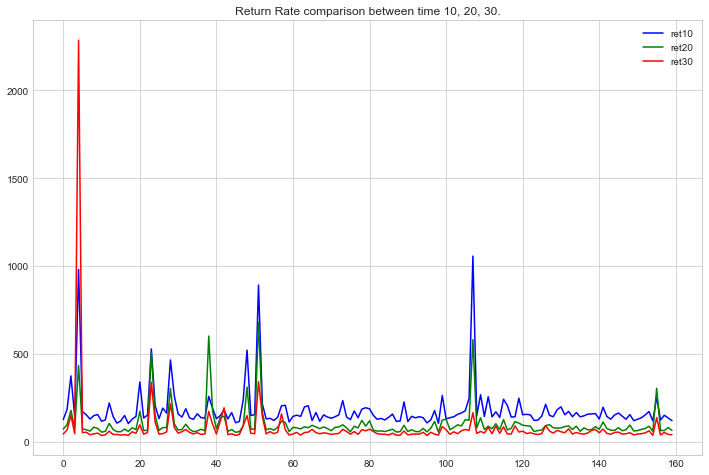

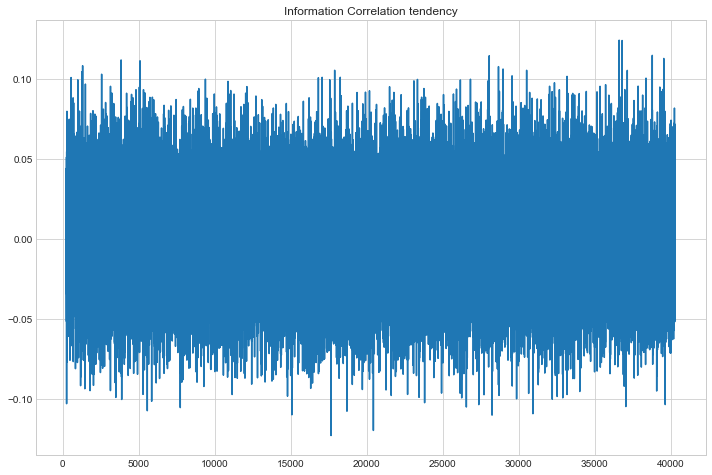

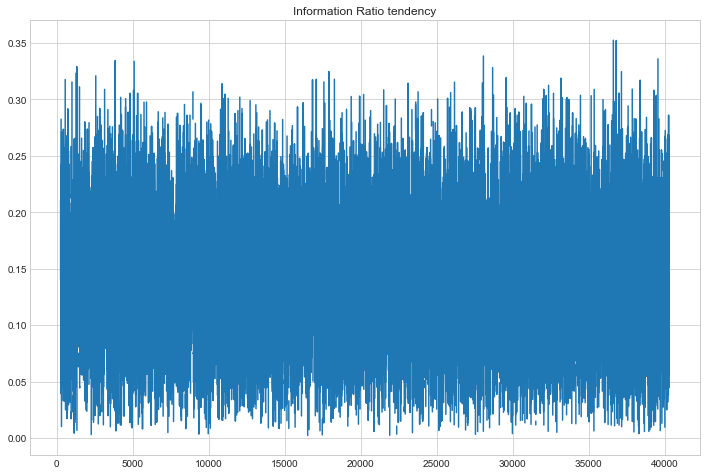

In [59]:
if __name__ == '__main__':
    x = np.random.rand(40320,1082)
    y = np.random.rand(40320,1082)
    IC, IR, Sharpe, IC_, IR_ = factor_analysis(x, y)

In [57]:
Y_10 = np.ones((int(y.shape[0]/250-1),1))*0.1

In [55]:
int(y.shape[0]/250-1)

160

In [28]:
IR

1.0

In [26]:
269418/1082

249.0